In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import *
from skimage.color import rgb2gray
from preprocess import align

In [2]:
dataset = get_dataset(filtered=True)
dataset

,filenames,areas,Ap,fx,fy,training
0,0.jpg,100.473,0.004410,0.066406,0.066406,True
1,1.jpg,127.880,0.009537,0.097656,0.097656,True
2,2.jpg,161.820,0.008072,0.089844,0.089844,True
3,3.jpg,190.003,0.008423,0.093750,0.089844,False
4,4.jpg,22.713,0.002579,0.050781,0.050781,True
...,...,...,...,...,...,...
350,350.jpg,98.599,0.004944,0.070312,0.070312,False
351,351.jpg,98.599,0.005508,0.074219,0.074219,False
352,352.jpg,98.599,0.004944,0.070312,0.070312,True
353,353.jpg,98.599,0.005508,0.074219,0.074219,True


In [15]:
norm = lambda img: (img - img.min())/(img.max() - img.min())
dataset['filtered'] = dataset.filenames.apply(get, args=[True, norm])
dataset['images'] = dataset.filenames.apply(get, args=[False, lambda img: align(rgb2gray(img))])

In [16]:
train = dataset[dataset.training]
test = dataset[~dataset.training]
len(train)/len(dataset)*100, len(test)/len(dataset)*100

(66.19718309859155, 33.80281690140845)

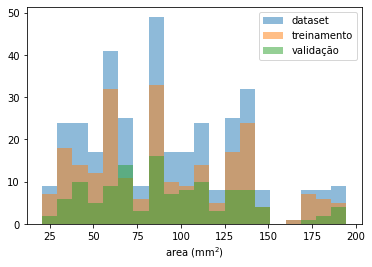

In [5]:
plt.hist(dataset.areas, alpha=0.5, bins=20, label='dataset')
plt.hist(train.areas, alpha=0.5, bins=20, label='treinamento')
plt.hist(test.areas, alpha=0.5, bins=20, label='validação')
plt.legend()
plt.xlabel(r'area (mm$^2$)')
plt.show()

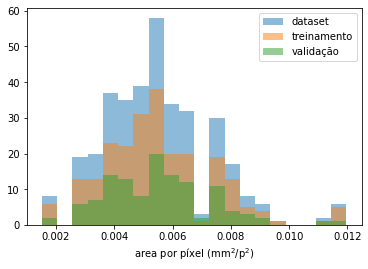

In [6]:
plt.hist(dataset.Ap, alpha=0.5, bins=20, label='dataset')
plt.hist(train.Ap, alpha=0.5, bins=20, label='treinamento')
plt.hist(test.Ap, alpha=0.5, bins=20, label='validação')
plt.legend()
plt.xlabel('area por píxel (mm$^2$/p$^2$)')
plt.show()

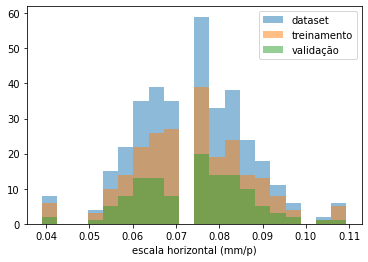

In [7]:
plt.hist(dataset.fx, alpha=0.5, bins=20, label='dataset')
plt.hist(train.fx, alpha=0.5, bins=20, label='treinamento')
plt.hist(test.fx, alpha=0.5, bins=20, label='validação')
plt.legend()
plt.xlabel('escala horizontal (mm/p)')
plt.show()

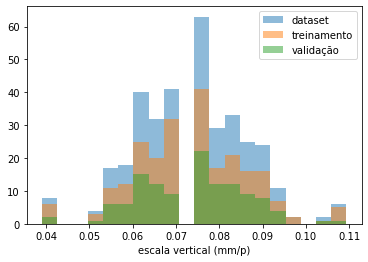

In [8]:
plt.hist(dataset.fy, alpha=0.5, bins=20, label='dataset')
plt.hist(train.fy, alpha=0.5, bins=20, label='treinamento')
plt.hist(test.fy, alpha=0.5, bins=20, label='validação')
plt.legend()
plt.xlabel('escala vertical (mm/p)')
plt.show()

In [17]:
filtered = np.array(dataset.filtered.to_list())
images = np.array(dataset.images.to_list())

In [41]:
window = (30, 30)
shape = filtered.shape[1:]
m, n, o, p = (
    shape[0]//2-window[0]//2,
    shape[0]//2+window[0]//2,
    shape[1]//2-window[1]//2,
    shape[1]//2+window[1]//2
)
filtered_inner = filtered[:, m:n, o:p]
filtered_outter = filtered[:, :window[0], :window[1]]
images_inner = images[:, m:n, o:p]
images_outter = images[:, :window[0], :window[1]]

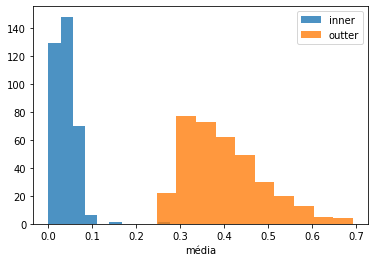

In [53]:
plt.hist(np.apply_over_axes(np.mean, filtered_inner, [1, 2])[:, 0, 0], alpha=0.8, label='inner')
plt.hist(np.apply_over_axes(np.mean, filtered_outter, [1, 2])[:, 0, 0], alpha=0.8, label='outter')
plt.legend()
plt.xlabel(f'média')
plt.show()

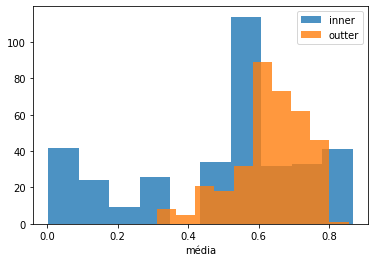

In [54]:
plt.hist(np.apply_over_axes(np.mean, images_inner, [1, 2])[:, 0, 0], alpha=0.8, label='inner')
plt.hist(np.apply_over_axes(np.mean, images_outter, [1, 2])[:, 0, 0], alpha=0.8, label='outter')
plt.legend()
plt.xlabel(f'média')
plt.show()